In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jocelyndumlao/consumer-review-of-clothing-product")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/consumer-review-of-clothing-product


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras_nlp
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [4]:
df = pd.read_csv('/kaggle/input/consumer-review-of-clothing-product/Consumer Review of Clothing Product/data_amazon.xlsx - Sheet1.csv')
df.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [5]:
df.shape

(49338, 9)

In [6]:
df.apply(pd.isnull).sum()

Title            3968
Review            831
Cons_rating       214
Cloth_class        16
Materials       43597
Construction    43595
Color           43596
Finishing       43601
Durability      43604
dtype: int64

In [7]:
df.duplicated().sum()

1118

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.dropna(subset = ['Review'], inplace = True)

In [10]:
df.shape

(48107, 9)

In [11]:
df['Cloth_class'].value_counts()

Cloth_class
Dresses           8416
Blouses           5293
Knits             4626
Jeans             3819
Sweaters          3803
Pants             3629
Jackets           3194
Shorts            3071
Sleep             2909
Shirts            2543
Blazer            1620
Suits             1313
Fine gauge        1059
Skirts             903
Lounge             668
Swim               330
Outerwear          319
Legwear            158
Intimates          147
Layering           132
Trend              118
Dress               22
Chemises             1
Casual bottoms       1
Name: count, dtype: int64

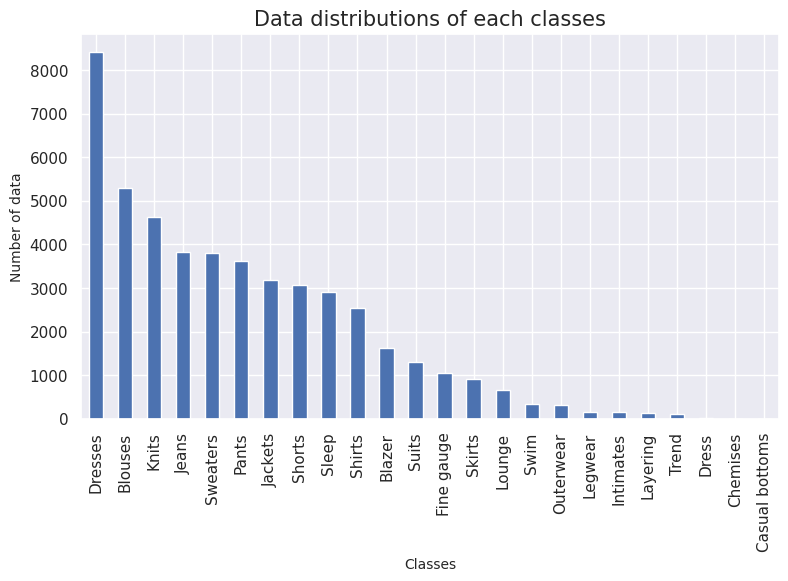

In [12]:
df['Cloth_class'].value_counts().plot(kind = 'bar', figsize = (9, 5))
plt.title('Data distributions of each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

In [13]:
df_k = df[df['Cloth_class'] == 'Knits']
df_b = df[df['Cloth_class'] == 'Blouses'].sample(df_k.shape[0])
df_d = df[df['Cloth_class'] == 'Dresses'].sample(df_k.shape[0])

In [14]:
df_balanced = pd.concat([df_k, df_b, df_d])

In [15]:
df_balanced.shape

(13878, 9)

In [16]:
df_balanced['Cloth_class'].value_counts()

Cloth_class
Knits      4626
Blouses    4626
Dresses    4626
Name: count, dtype: int64

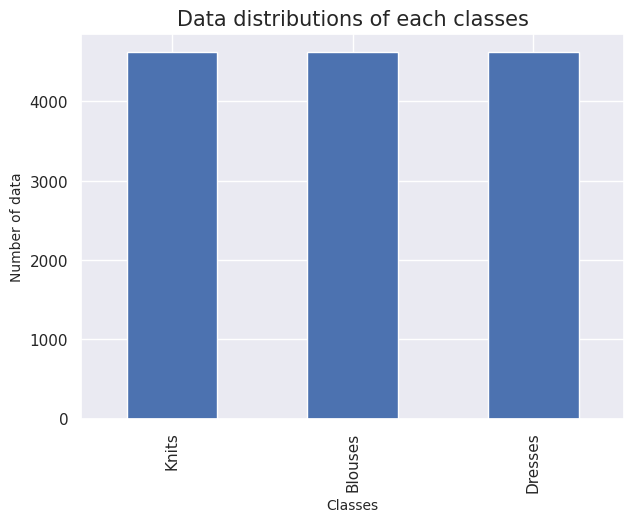

In [17]:
df_balanced['Cloth_class'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distributions of each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [18]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13878 entries, 6 to 48682
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         12451 non-null  object 
 1   Review        13878 non-null  object 
 2   Cons_rating   13872 non-null  float64
 3   Cloth_class   13878 non-null  object 
 4   Materials     2084 non-null   float64
 5   Construction  2084 non-null   float64
 6   Color         2084 non-null   float64
 7   Finishing     2081 non-null   float64
 8   Durability    2076 non-null   float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


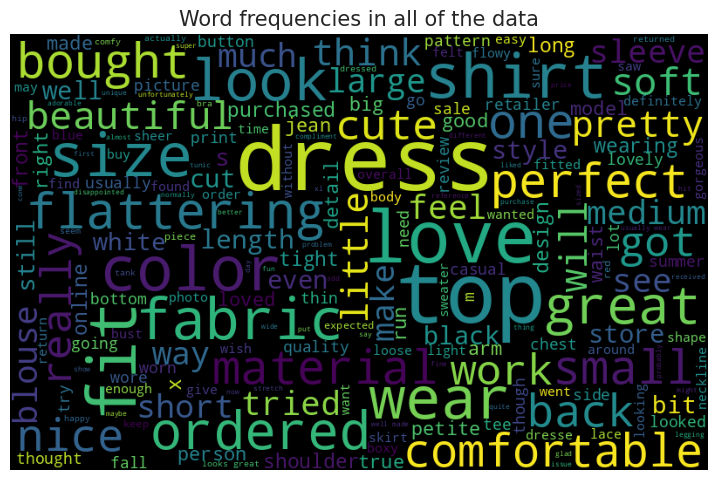

In [19]:
plt.figure(figsize = (9, 9))
all_sents = ' '.join([sentence for sentence in df_balanced['Review']])
word_cloud = WordCloud(width = 800, height = 500, max_font_size = 100, random_state = 101).generate(all_sents)
plt.imshow(word_cloud)
plt.title('Word frequencies in all of the data', fontsize = 15)
plt.axis('off')
plt.show()

In [20]:
def word_cloud(data, class_name):
    plt.figure(figsize = (9, 9))
    all_sents = ' '.join([sentence for sentence in data['Review'][data['Cloth_class'] == class_name]])
    word_cl = WordCloud(width = 800, height = 500, max_font_size = 100, random_state = 101).generate(all_sents)
    plt.imshow(word_cl)
    plt.title(class_name, fontsize = 15)
    plt.axis('off')
    plt.show()

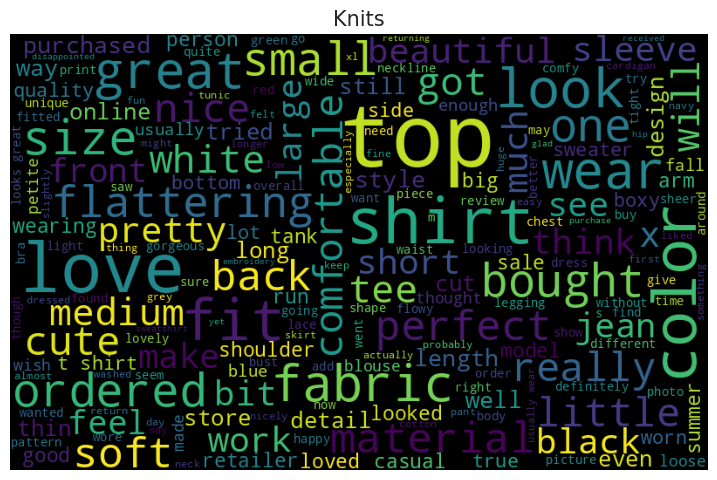

In [21]:
word_cloud(df_balanced, 'Knits')

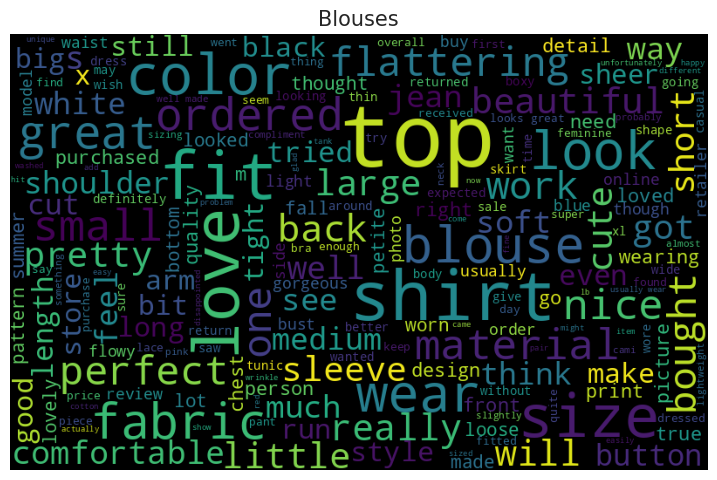

In [22]:
word_cloud(df_balanced, 'Blouses')

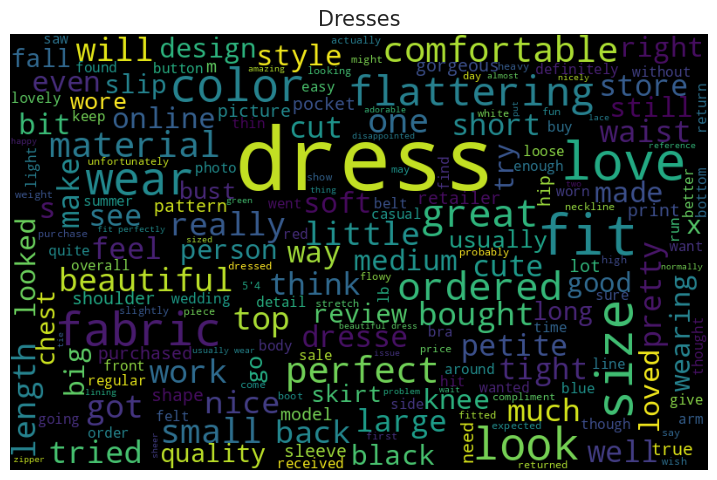

In [23]:
word_cloud(df_balanced, 'Dresses')

In [24]:
le = LabelEncoder()

In [25]:
df_balanced['labels'] = le.fit_transform(df_balanced['Cloth_class'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Review'], df_balanced['labels'], test_size = 0.3, shuffle = True, 
                                                   stratify = df_balanced['labels'], random_state = 101)

In [27]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.1, shuffle = True, stratify = y_test,
                                                   random_state = 101)

In [28]:
print('The training set size is:', len(X_train))
print('The test set size is:', len(X_test))
print('The validation set size is:', len(X_valid))

The training set size is: 9714
The test set size is: 3747
The validation set size is: 417


In [29]:
X_train_ragged = tf.ragged.constant(X_train.values)

In [30]:
X_train_tensor = tf.convert_to_tensor(X_train_ragged)

In [31]:
X_test_ragged = tf.ragged.constant(X_test.values)

In [32]:
X_test_tensor = tf.convert_to_tensor(X_test_ragged)

In [33]:
X_valid_ragged = tf.ragged.constant(X_valid.values)

In [34]:
X_valid_tensor = tf.convert_to_tensor(X_valid_ragged)

In [35]:
train_sliced = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train.values))

In [36]:
test_sliced = tf.data.Dataset.from_tensor_slices((X_test_tensor, y_test.values))

In [37]:
valid_sliced = tf.data.Dataset.from_tensor_slices((X_valid_tensor, y_valid.values))

In [38]:
train_data = train_sliced.cache().shuffle(len(X_train)).prefetch(tf.data.AUTOTUNE).batch(32)

In [39]:
test_data = test_sliced.cache().shuffle(len(X_test)).prefetch(tf.data.AUTOTUNE).batch(32)

In [40]:
valid_data = valid_sliced.cache().shuffle(len(X_valid)).prefetch(tf.data.AUTOTUNE).batch(32)

In [41]:
tokenizer = keras_nlp.models.BertTokenizer.from_preset('bert_small_en_uncased')

In [42]:
preprocessor = keras_nlp.models.BertPreprocessor(
    tokenizer, sequence_length = 80, truncate = 'round_robin'
)

In [43]:
model = keras_nlp.models.BertClassifier.from_preset(
    'bert_small_en_uncased', preprocessor = preprocessor, num_classes = 3
)

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [45]:
model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = ['accuracy'],
    jit_compile = True
)

In [46]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [47]:
history = model.fit(train_data, validation_data = valid_data, epochs = 10, callbacks = [early_stopping])

Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 56s 107ms/step - accuracy: 0.5297 - loss: 0.9392 - val_accuracy: 0.7026 - val_loss: 0.6093
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7006 - loss: 0.6004 - val_accuracy: 0.7170 - val_loss: 0.5422
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7277 - loss: 0.5280 - val_accuracy: 0.7530 - val_loss: 0.5255
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7511 - loss: 0.4991 - val_accuracy: 0.7914 - val_loss: 0.4889
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7788 - loss: 0.4511 - val_accuracy: 0.7698 - val_loss: 0.5120
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8020 - loss: 0.4173 - val_accuracy: 0.7914 - val_loss: 0.4988


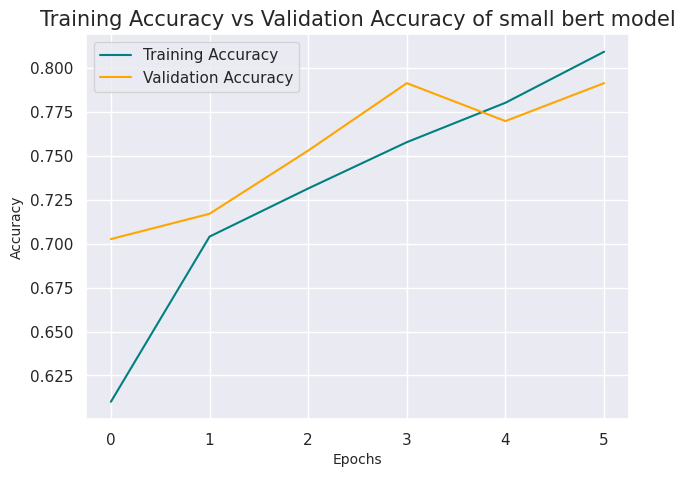

In [48]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of small bert model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

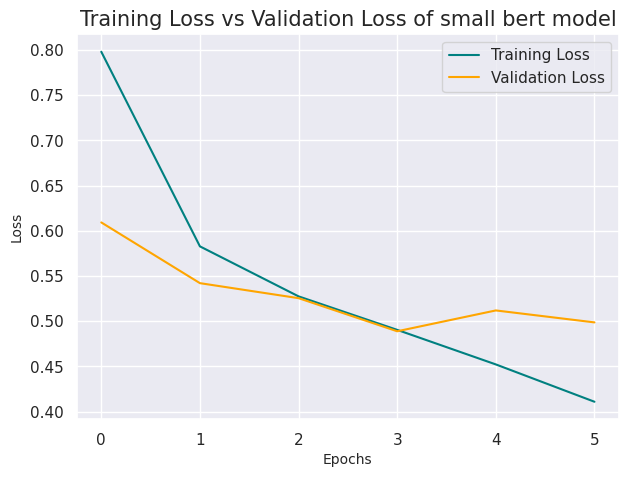

In [49]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of small bert model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [50]:
model.evaluate(test_data)

118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7329 - loss: 0.5376


[0.5358901023864746, 0.7381905317306519]

In [51]:
pred = model.predict(X_test_tensor)

118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step


In [52]:
pred[:10]

array([[-1.3098565 ,  3.857707  , -1.8283355 ],
       [ 1.5217193 , -3.436955  ,  1.5422822 ],
       [ 1.6868082 , -3.9723861 ,  2.0633464 ],
       [-1.0746459 , -0.0774765 ,  1.2142155 ],
       [-0.9200618 , -2.579631  ,  3.0972672 ],
       [ 0.683473  , -2.2792535 ,  1.3582158 ],
       [ 1.2386415 , -3.9393177 ,  2.166627  ],
       [ 1.8611611 , -4.05141   ,  1.570587  ],
       [ 1.4681431 , -3.6707144 ,  1.9904202 ],
       [ 0.5561254 ,  0.38040313, -0.235048  ]], dtype=float32)

In [53]:
y_pred = [np.argmax(i) for i in pred]

In [54]:
y_pred[:10]

[1, 2, 2, 2, 2, 2, 2, 0, 2, 0]

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1249
           1       0.89      0.87      0.88      1249
           2       0.68      0.71      0.69      1249

    accuracy                           0.74      3747
   macro avg       0.74      0.74      0.74      3747
weighted avg       0.74      0.74      0.74      3747



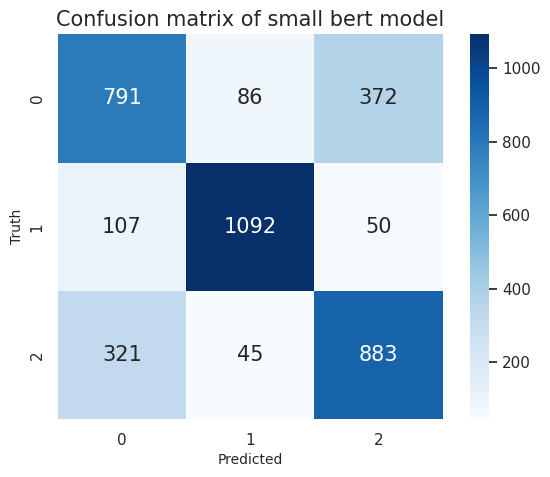

In [58]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cbar = True, square = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of small bert model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [59]:
tokenizer2 = keras_nlp.models.BertTokenizer.from_preset('bert_large_en_uncased')

In [60]:
preprocessor2 = keras_nlp.models.BertPreprocessor(
    tokenizer2, sequence_length = 80, truncate = 'round_robin'
)

In [61]:
model2 = keras_nlp.models.BertClassifier.from_preset(
    'bert_large_en_uncased', preprocessor = preprocessor2, num_classes = 3
)

In [65]:
model2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [66]:
early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [67]:
history2 = model2.fit(train_data, validation_data = valid_data, epochs = 10, callbacks = [early_stopping2])

Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.5846 - loss: 0.8194 - val_accuracy: 0.7170 - val_loss: 0.5649
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 227s 746ms/step - accuracy: 0.7078 - loss: 0.5540 - val_accuracy: 0.7482 - val_loss: 0.5640
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 227s 746ms/step - accuracy: 0.7558 - loss: 0.4798 - val_accuracy: 0.7722 - val_loss: 0.5393
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 227s 745ms/step - accuracy: 0.8102 - loss: 0.3986 - val_accuracy: 0.7530 - val_loss: 0.5634
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 227s 746ms/step - accuracy: 0.8613 - loss: 0.3101 - val_accuracy: 0.7602 - val_loss: 0.5886


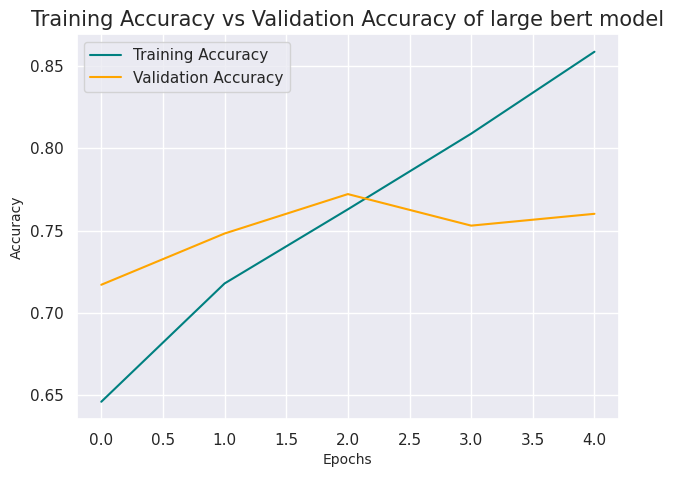

In [68]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of large bert model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

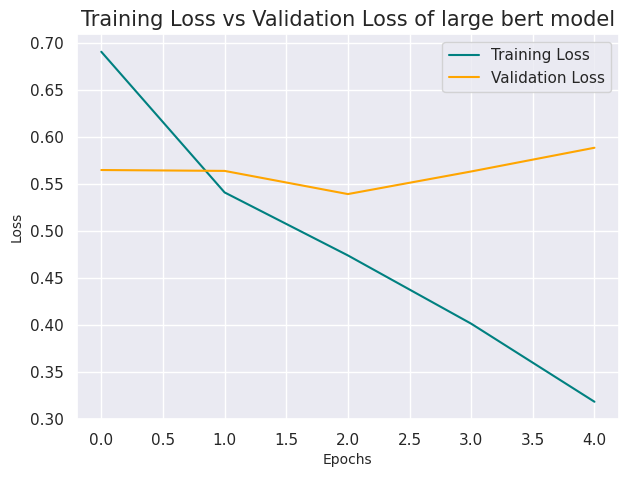

In [70]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of large bert model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [71]:
model2.evaluate(test_data)

118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 296ms/step - accuracy: 0.7555 - loss: 0.5877


[0.6023359298706055, 0.7467307448387146]

In [72]:
pred2 = model2.predict(X_test_tensor)

118/118 ━━━━━━━━━━━━━━━━━━━━ 48s 314ms/step


In [73]:
y_pred2 = [np.argmax(i) for i in pred2]

In [74]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      1249
           1       0.89      0.88      0.89      1249
           2       0.68      0.74      0.71      1249

    accuracy                           0.75      3747
   macro avg       0.75      0.75      0.75      3747
weighted avg       0.75      0.75      0.75      3747



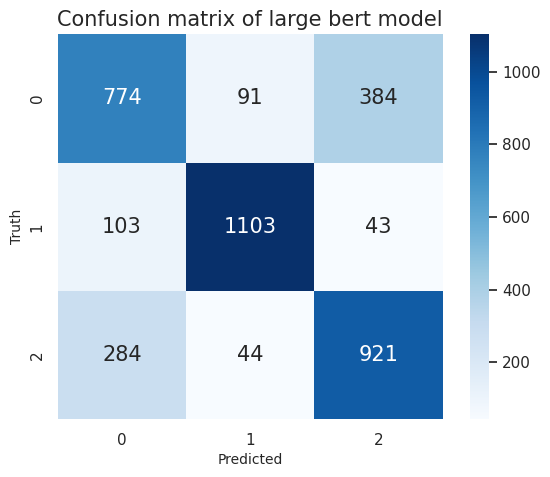

In [75]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of large bert model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [76]:
tokenizer3 = keras_nlp.models.BertTokenizer.from_preset('bert_medium_en_uncased')

In [78]:
preprocessor3 = keras_nlp.models.BertPreprocessor(
    tokenizer3, sequence_length = 80, truncate = 'round_robin'
)

In [79]:
model3 = keras_nlp.models.BertClassifier.from_preset(
    'bert_medium_en_uncased', preprocessor = preprocessor3, num_classes = 3
)

In [80]:
model3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [82]:
early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [83]:
history3 = model3.fit(train_data, validation_data = valid_data, epochs = 10, callbacks = [early_stopping3])

Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 101s 194ms/step - accuracy: 0.5614 - loss: 0.8562 - val_accuracy: 0.7314 - val_loss: 0.5641
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.7296 - loss: 0.5442 - val_accuracy: 0.7578 - val_loss: 0.5169
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.7527 - loss: 0.4914 - val_accuracy: 0.7530 - val_loss: 0.5229
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.7849 - loss: 0.4469 - val_accuracy: 0.7602 - val_loss: 0.5149
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.8137 - loss: 0.3928 - val_accuracy: 0.7554 - val_loss: 0.5743
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.8408 - loss: 0.3467 - val_accuracy: 0.7698 - val_loss: 0.5688


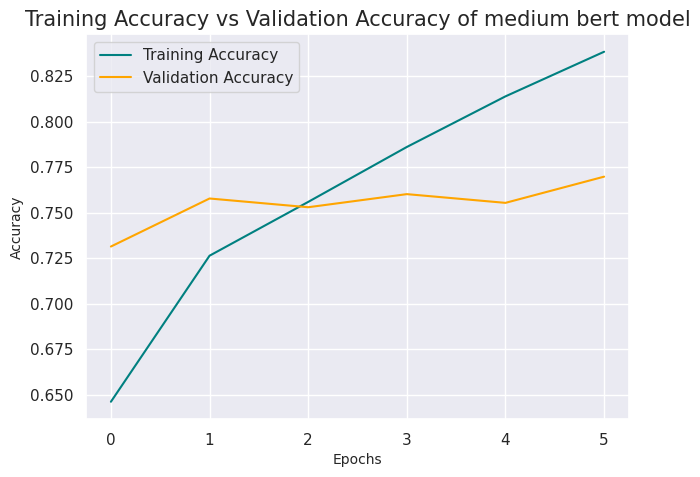

In [84]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of medium bert model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

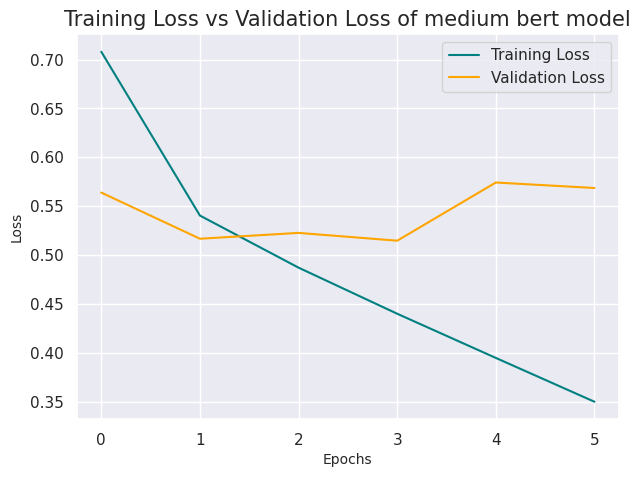

In [85]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history3.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of medium bert model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [86]:
model3.evaluate(test_data)

118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.7220 - loss: 0.6185


[0.6058472394943237, 0.7309848070144653]

In [87]:
pred3 = model3.predict(X_test_tensor)

118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step


In [88]:
y_pred3 = [np.argmax(i) for i in pred3]

In [89]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.47      0.57      1249
           1       0.83      0.91      0.87      1249
           2       0.64      0.81      0.72      1249

    accuracy                           0.73      3747
   macro avg       0.74      0.73      0.72      3747
weighted avg       0.74      0.73      0.72      3747



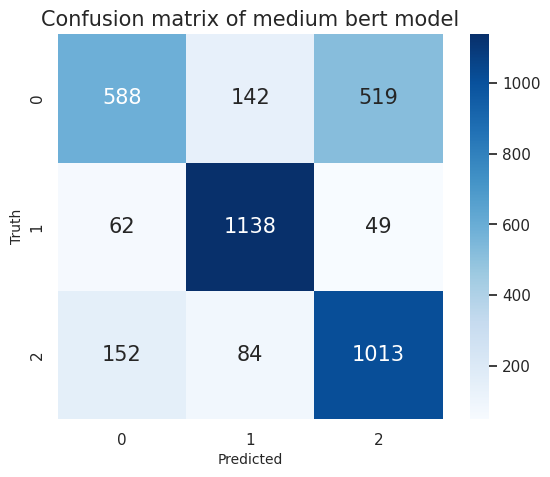

In [90]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of medium bert model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()